In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [134]:
# Reading the data
train_data=pd.read_csv(r"C:\Users\HP\Desktop\House\train.csv")
test_data=pd.read_csv(r"C:\Users\HP\Desktop\House\test.csv")

In [135]:
train_data.shape

(1460, 81)

In [136]:
test_data.shape

(1459, 80)

In [137]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [138]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [139]:
train_data.set_index('Id', inplace=True)

In [140]:
test_data.set_index('Id', inplace=True)

In [141]:
SalePrice=train_data['SalePrice']

In [142]:
train=train_data.drop('SalePrice', axis=1)

In [143]:
# Concat test and train data to obtain more precise analising
df=pd.concat([train, test_data], keys=['x', 'y'], axis=0)

In [144]:
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
  Id                                                                    
x 1           60       RL         65.0     8450   Pave   NaN      Reg   
  2           20       RL         80.0     9600   Pave   NaN      Reg   
  3           60       RL         68.0    11250   Pave   NaN      IR1   
  4           70       RL         60.0     9550   Pave   NaN      IR1   
  5           60       RL         84.0    14260   Pave   NaN      IR1   

     LandContour Utilities LotConfig  ... ScreenPorch PoolArea PoolQC Fence  \
  Id                                  ...                                     
x 1          Lvl    AllPub    Inside  ...           0        0    NaN   NaN   
  2          Lvl    AllPub       FR2  ...           0        0    NaN   NaN   
  3          Lvl    AllPub    Inside  ...           0        0    NaN   NaN   
  4          Lvl    AllPub    Corner  ...           0        0    NaN   NaN   
  5          Lvl    AllPub       FR2  ...           0        0    NaN   NaN   

     MiscFeature MiscVal  MoSold  YrSold  SaleType  SaleCondition  
  Id                                                               
x 1          NaN       0       2    2008        WD         Normal  
  2          NaN       0       5    2007        WD         Normal  
  3          NaN       0       9    2008        WD         Normal  
  4          NaN       0       2    2006        WD        Abnorml  
  5          NaN       0      12    2008        WD         Normal  

[5 rows x 79 columns]

In [145]:
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False).head(10)

PoolQC          0.996574
MiscFeature     0.964029
Alley           0.932169
Fence           0.804385
FireplaceQu     0.486468
LotFrontage     0.166495
GarageCond      0.054471
GarageQual      0.054471
GarageYrBlt     0.054471
GarageFinish    0.054471
dtype: float64

In [146]:
null_cols=(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)
null_cols

PoolQC         0.996574
MiscFeature    0.964029
Alley          0.932169
Fence          0.804385
FireplaceQu    0.486468
                 ...   
1stFlrSF       0.000000
CentralAir     0.000000
Heating        0.000000
Foundation     0.000000
MSSubClass     0.000000
Length: 79, dtype: float64

In [147]:
droping_cols=(null_cols[null_cols>0.06]).index

In [148]:
df.drop(droping_cols, axis=1, inplace=True)

In [149]:
df.head()

MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities  \
  Id                                                                       
x 1           60       RL     8450   Pave      Reg         Lvl    AllPub   
  2           20       RL     9600   Pave      Reg         Lvl    AllPub   
  3           60       RL    11250   Pave      IR1         Lvl    AllPub   
  4           70       RL     9550   Pave      IR1         Lvl    AllPub   
  5           60       RL    14260   Pave      IR1         Lvl    AllPub   

     LotConfig LandSlope Neighborhood  ... OpenPorchSF EnclosedPorch  \
  Id                                   ...                             
x 1     Inside       Gtl      CollgCr  ...          61             0   
  2        FR2       Gtl      Veenker  ...           0             0   
  3     Inside       Gtl      CollgCr  ...          42             0   
  4     Corner       Gtl      Crawfor  ...          35           272   
  5        FR2       Gtl      NoRidge  ...          84             0   

     3SsnPorch ScreenPorch  PoolArea  MiscVal  MoSold  YrSold SaleType  \
  Id                                                                     
x 1          0           0         0        0       2    2008       WD   
  2          0           0         0        0       5    2007       WD   
  3          0           0         0        0       9    2008       WD   
  4          0           0         0        0       2    2006       WD   
  5          0           0         0        0      12    2008       WD   

     SaleCondition  
  Id                
x 1         Normal  
  2         Normal  
  3         Normal  
  4        Abnorml  
  5         Normal  

[5 rows x 73 columns]

In [150]:
# Copy of df -> without columns obtaining nulls more than 6%
all_data=df.copy()

In [151]:
#numeric columns
numeric=df._get_numeric_data().columns
print(numeric)

#categoric columns
categoric=list(set(df.columns)-set(numeric))
print(categoric)

print(len(numeric))
print(len(categoric))

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')
['Exterior1st', 'GarageQual', 'BldgType', 'ExterCond', 'SaleCondition', 'Neighborhood', 'GarageCond', 'RoofStyle', 'LandSlope', 'LotConfig', 'GarageType', 'Condition1', 'BsmtQual', 'BsmtFinType1', 'Electrical', 'BsmtFinType2', 'CentralAir', 'LandContour', 'Exterior2nd', 'BsmtCond', 'SaleType', 'GarageFinish', 'Heating', 'MSZoning', 'HouseStyle', 'Foundation', 'HeatingQC', 'LotShape', 'Condition2', 'PavedDrive', 'BsmtExposure', 'Exte

In [152]:
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False).head(15)

GarageQual      0.054471
GarageYrBlt     0.054471
GarageFinish    0.054471
GarageCond      0.054471
GarageType      0.053786
BsmtCond        0.028092
BsmtExposure    0.028092
BsmtQual        0.027749
BsmtFinType2    0.027407
BsmtFinType1    0.027064
MasVnrType      0.008222
MasVnrArea      0.007879
MSZoning        0.001370
BsmtHalfBath    0.000685
BsmtFullBath    0.000685
dtype: float64

# Null values

In [153]:
# Filling null values of numeric columns with mean()
for col in numeric:
    df[col]=df[col].fillna(df[col].mean())

In [154]:
# Filling null values of categoric columns with mode()
for col in categoric:
    df[col]=df[col].fillna(df[col].mode()[0])

In [155]:
df.isnull().sum().sum()

0

# Outliers

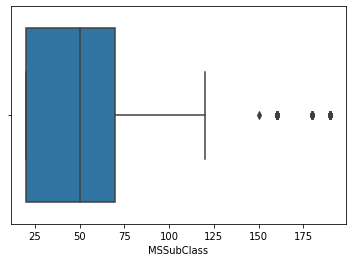

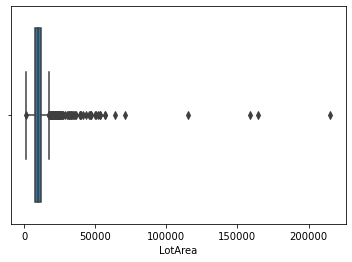

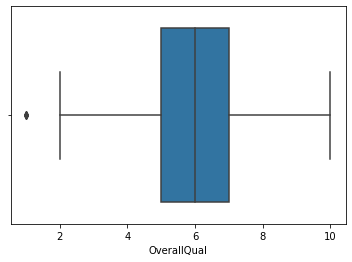

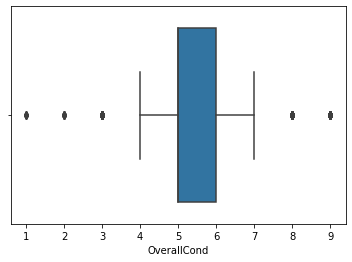

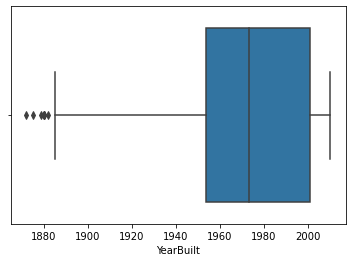

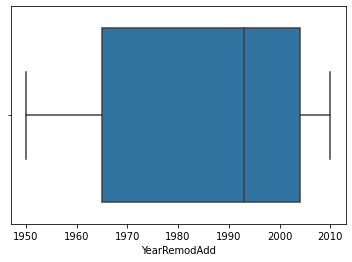

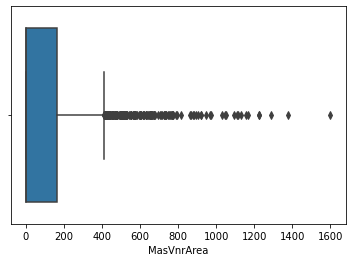

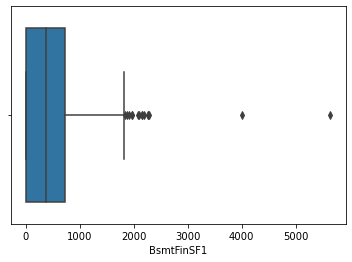

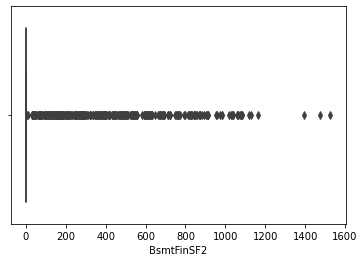

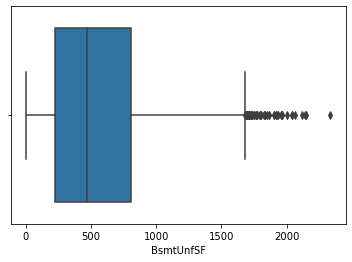

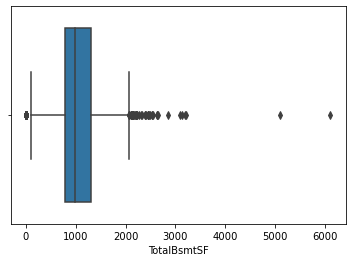

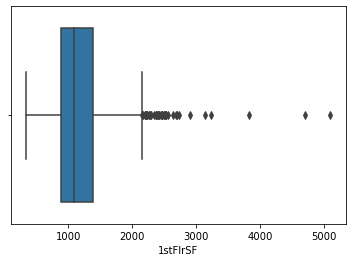

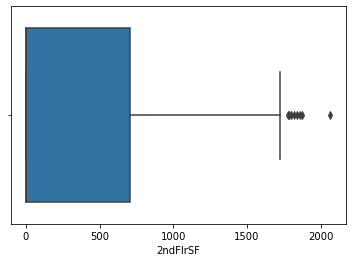

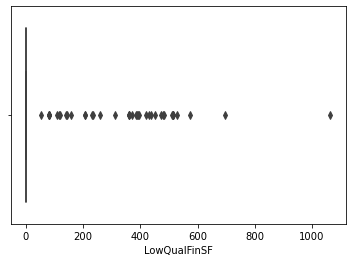

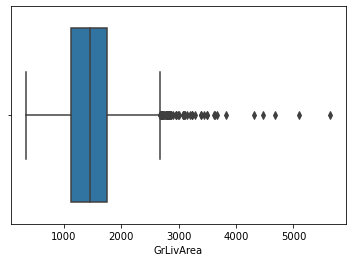

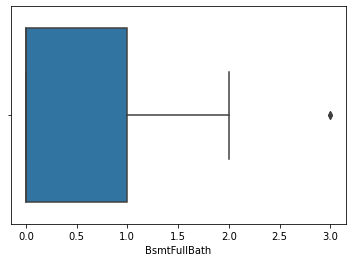

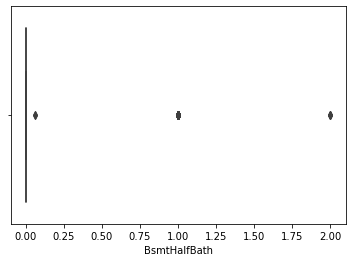

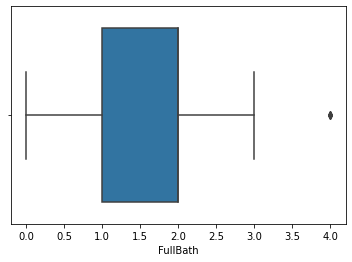

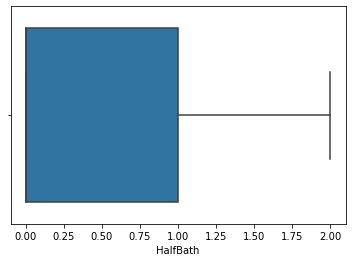

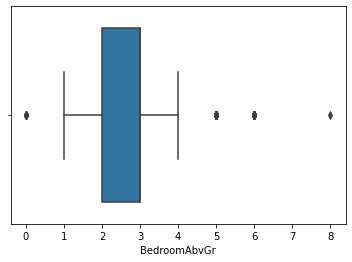

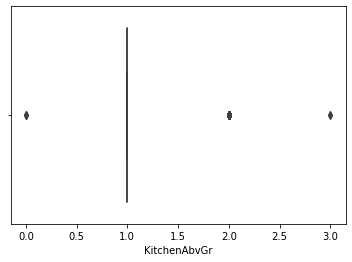

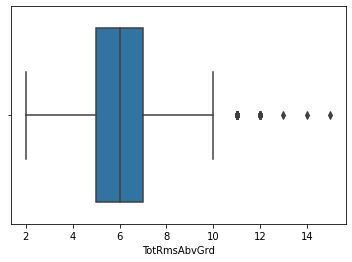

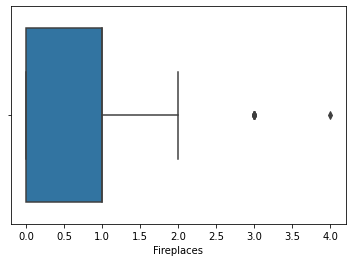

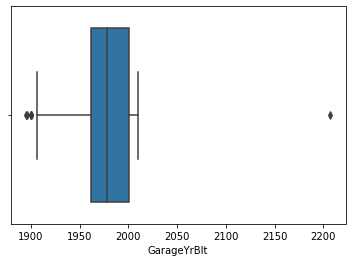

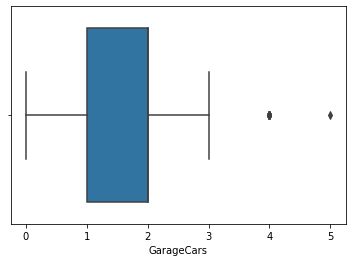

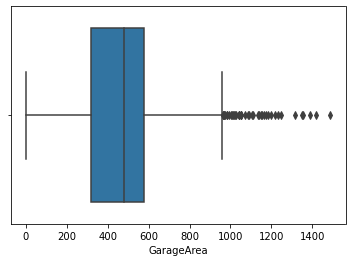

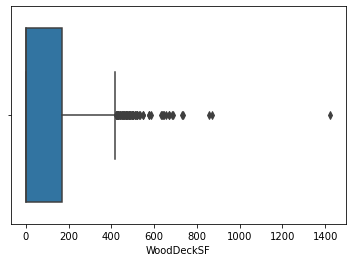

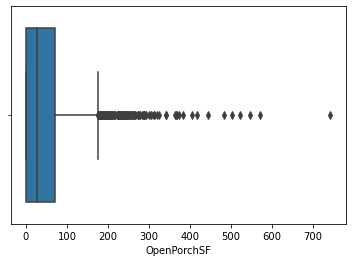

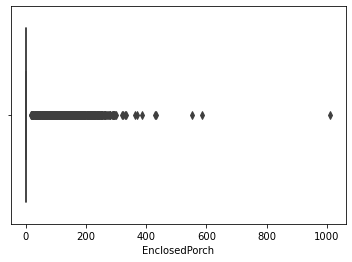

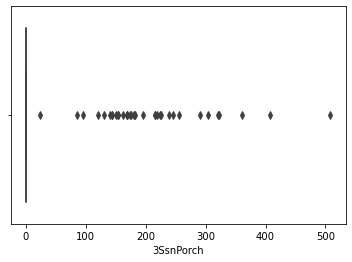

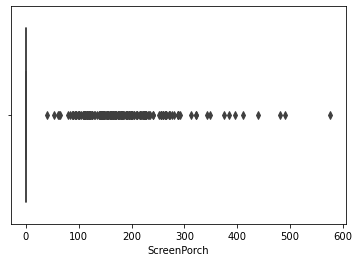

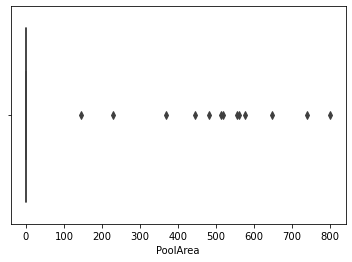

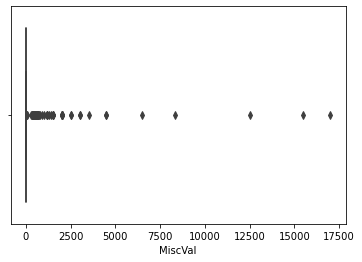

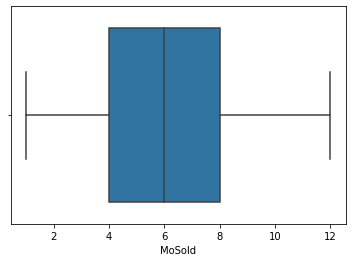

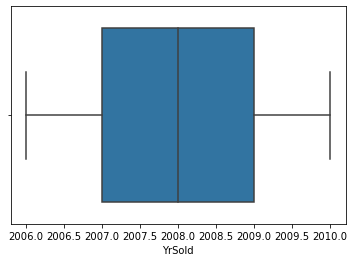

In [156]:
for i in numeric:
    sns.boxplot(df[i])
    plt.show()

In [157]:
# Method for replacing outliers with thresholds
def outlier(df, column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-(1.5*IQR)
    upper_bound=Q3+(1.5*IQR)
    df.loc[(df[column]<lower_bound), column]=lower_bound
    df.loc[(df[column]>upper_bound), column]=upper_bound
    return df

In [158]:
for col in numeric:
    df=outlier(df, col)

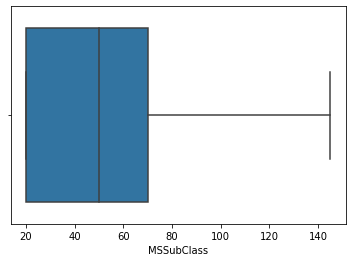

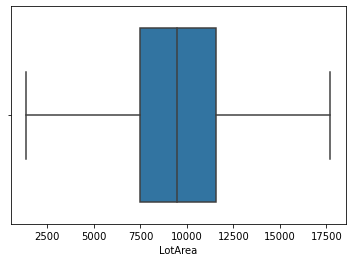

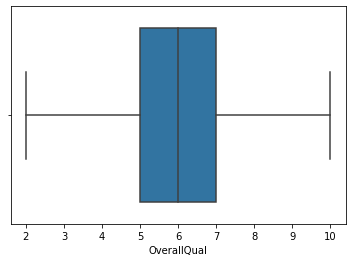

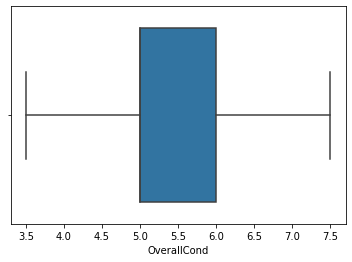

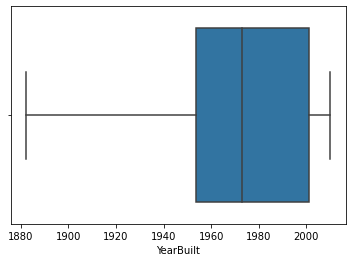

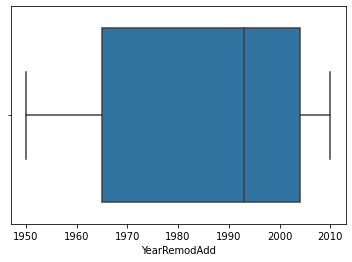

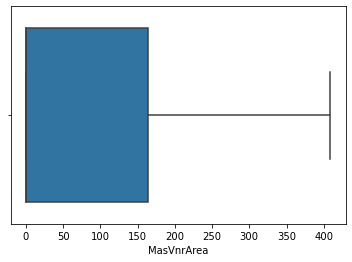

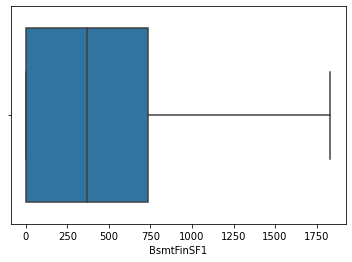

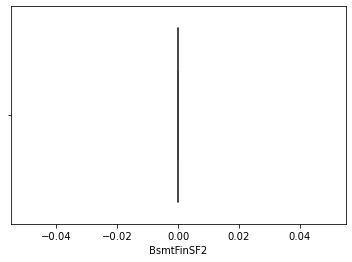

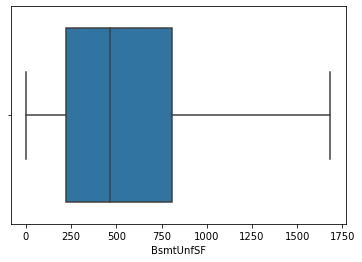

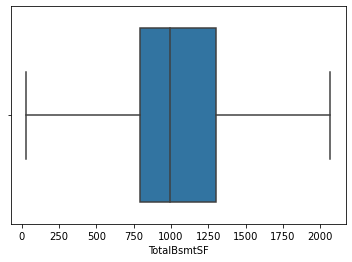

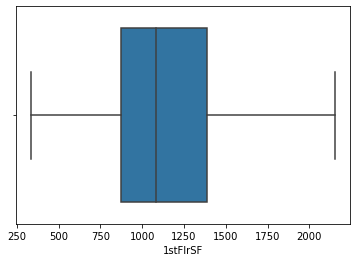

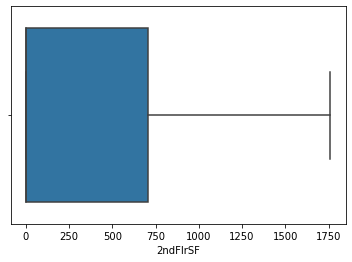

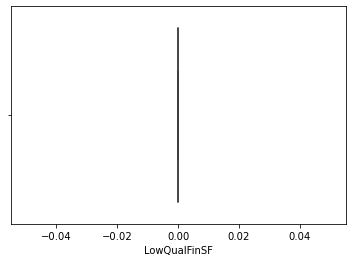

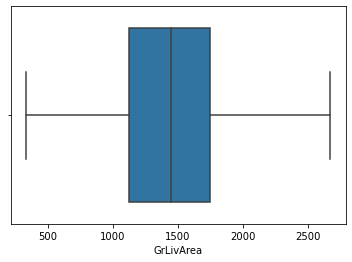

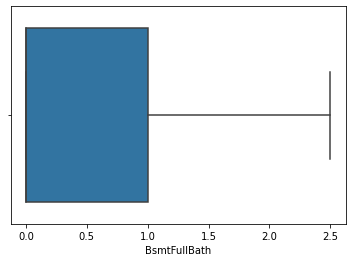

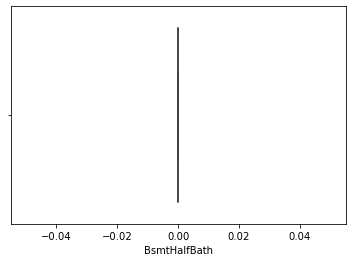

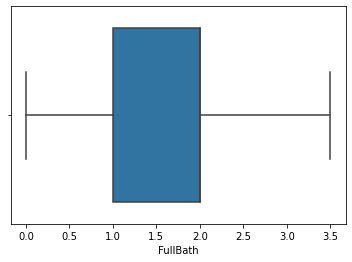

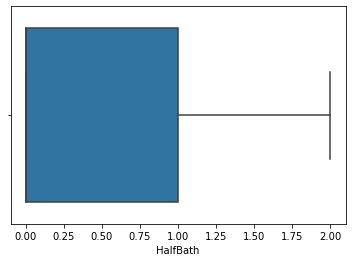

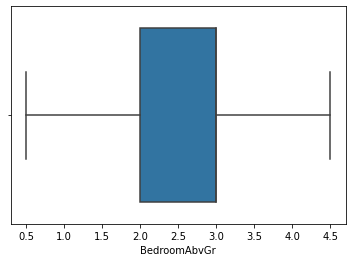

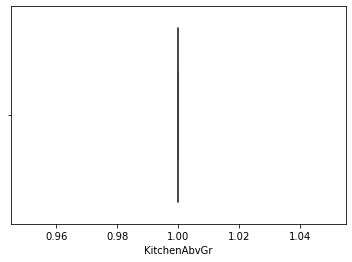

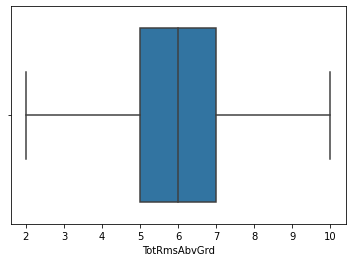

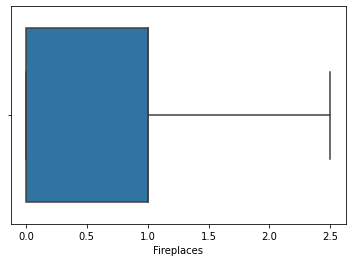

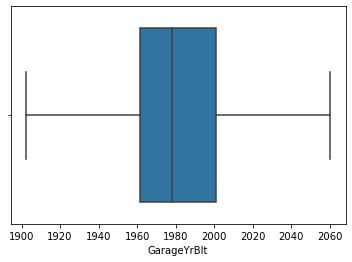

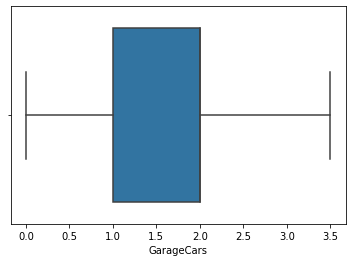

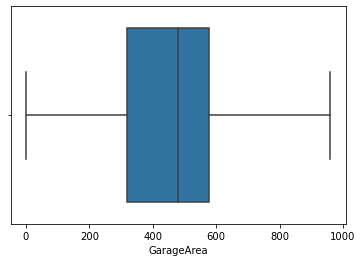

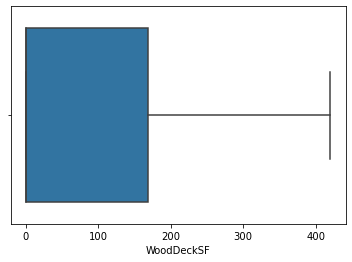

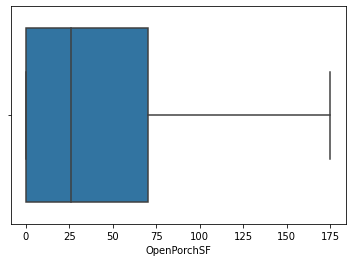

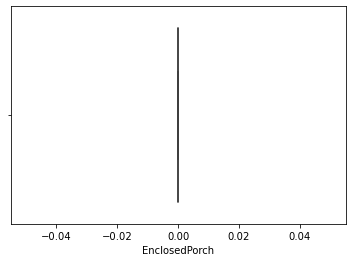

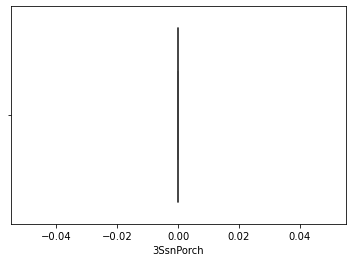

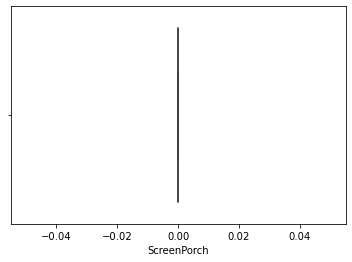

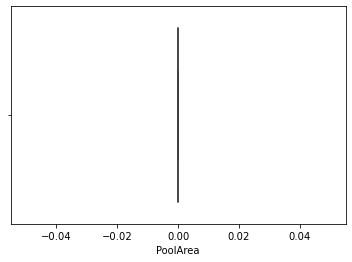

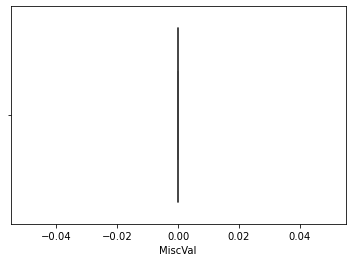

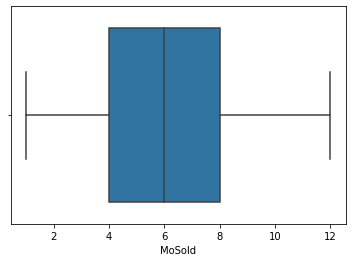

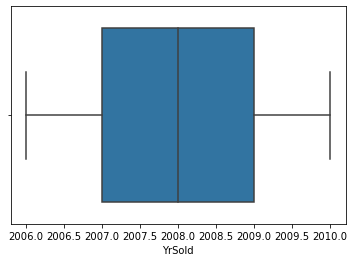

In [159]:
# Result of managing outliers
for col in numeric:
    sns.boxplot(df[col])
    plt.show()

In [160]:
uniques=df.nunique().sort_values().head(10)
uniques

3SsnPorch        1
LowQualFinSF     1
BsmtFinSF2       1
EnclosedPorch    1
MiscVal          1
PoolArea         1
ScreenPorch      1
BsmtHalfBath     1
KitchenAbvGr     1
CentralAir       2
dtype: int64

In [161]:
# Dropping columns with only one value
uniques=uniques.head(9).index

df.drop(uniques,axis=1,inplace=True)


# Correlation

In [162]:
# Correlation dataframe of df
corr=train_data.corr()

In [163]:
# Correlation dataframe of df where correlation is higher than 0.5 (for SalePrice)
corr=corr[abs(corr['SalePrice'])>0.5]

In [164]:
corr

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
TotalBsmtSF,-0.238518,0.392075,0.260833,0.537808,-0.171098,0.391452,0.291066,0.363936,0.522396,0.104810,...,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.013196,-0.014969,0.613581
1stFlrSF,-0.251758,0.457181,0.299475,0.476224,-0.144203,0.281986,0.240379,0.344501,0.445863,0.097117,...,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.031372,-0.013604,0.605852
GrLivArea,0.074853,0.402797,0.263116,0.593007,-0.079686,0.199010,0.287389,0.390857,0.208171,-0.009640,...,0.247433,0.330224,0.009113,0.020643,0.101510,0.170205,-0.002416,0.050240,-0.036526,0.708624
FullBath,0.131608,0.198769,0.126031,0.550600,-0.194149,0.468271,0.439046,0.276833,0.058543,-0.076444,...,0.187703,0.259977,-0.115093,0.035353,-0.008106,0.049604,-0.014290,0.055872,-0.019669,0.560664
TotRmsAbvGrd,0.040380,0.352096,0.190015,0.427452,-0.057583,0.095589,0.191740,0.280682,0.044316,-0.035227,...,0.165984,0.234192,0.004151,-0.006683,0.059383,0.083757,0.024763,0.036907,-0.034516,0.533723
GarageCars,-0.040110,0.285691,0.154871,0.600671,-0.185758,0.537850,0.420622,0.364204,0.224054,-0.038264,...,0.226342,0.213569,-0.151434,0.035765,0.050494,0.020934,-0.043080,0.040522,-0.039117,0.640409
GarageArea,-0.098672,0.344997,0.180403,0.562022,-0.151521,0.478954,0.371600,0.373066,0.296970,-0.018227,...,0.224666,0.241435,-0.121777,0.035087,0.051412,0.061047,-0.027400,0.027974,-0.027378,0.623431


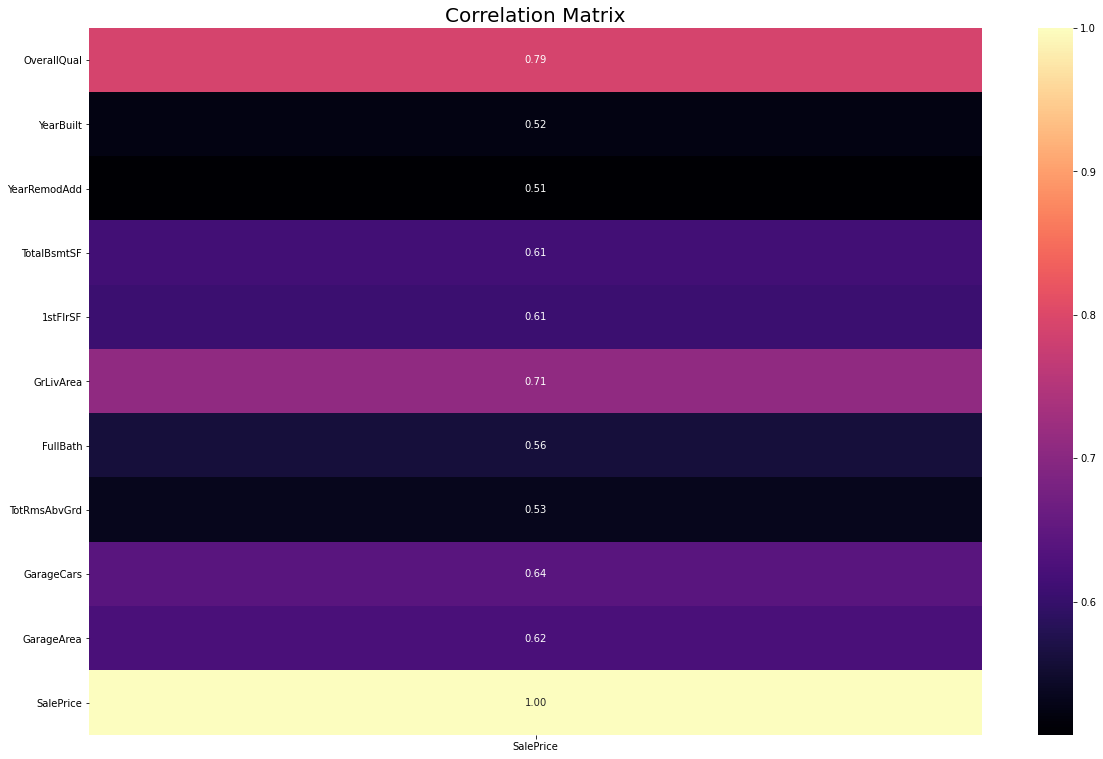

In [165]:
# Correlation matrix of highest corr_rate for SalePrice
f, ax = plt.subplots(figsize= [20,13])
sns.heatmap(corr["SalePrice"].to_frame(), annot=True, fmt=".2f", ax=ax, cmap = "magma" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

In [166]:
df.drop(["OverallQual","GrLivArea"],axis=1,inplace=True)

In [167]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler


In [168]:
# Method for normalizing 
def minmax_scaler(df, cols, feature_range=(0,1)):
    minmax_scaler = MinMaxScaler(feature_range=feature_range)
    col_names=[col for col in cols]
    df[cols] = minmax_scaler.fit_transform(df[cols])
    return df

In [169]:
df_copy=df.copy()

In [170]:
# Normalizing all numeric data
numeric=df._get_numeric_data().columns
df=minmax_scaler(df,numeric)

# Encoder

In [171]:
# Encoding df
df=pd.get_dummies(df, drop_first=True)

In [172]:
df.head()

MSSubClass   LotArea  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  \
  Id                                                                           
x 1         0.32  0.434384        0.375   0.945205      0.883333    0.479511   
  2         0.00  0.504643        1.000   0.733855      0.433333    0.000000   
  3         0.32  0.605450        0.375   0.929550      0.866667    0.396330   
  4         0.40  0.501588        0.375   0.256360      0.333333    0.000000   
  5         0.32  0.789345        0.375   0.921722      0.833333    0.856269   

      BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  1stFlrSF  ...  SaleType_ConLI  \
  Id                                                ...                   
x 1     0.385266   0.089153     0.405943  0.286695  ...               0   
  2     0.533697   0.168796     0.605354  0.509680  ...               0   
  3     0.265211   0.257949     0.437377  0.321845  ...               0   
  4     0.117872   0.320951     0.356827  0.344364  ...               0   
  5     0.357435   0.291233     0.547888  0.445421  ...               0   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
  Id                                                            
x 1                0             0             0            1   
  2                0             0             0            1   
  3                0             0             0            1   
  4                0             0             0            1   
  5                0             0             0            1   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
  Id                                                                      
x 1                       0                     0                     0   
  2                       0                     0                     0   
  3                       0                     0                     0   
  4                       0                     0                     0   
  5                       0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
  Id                                               
x 1                      1                      0  
  2                      1                      0  
  3                      1                      0  
  4                      0                      0  
  5                      1                      0  

[5 rows x 220 columns]

# Model

In [173]:
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [174]:
Train=df.loc['x']
Train.name="Train"
Test=df.loc['y']
Test.name="Test"
Train['SalePrice']=SalePrice

Train=minmax_scaler(Train,["SalePrice"])


In [175]:
def reg_modeling(df, Y, algo):
    X=df.drop(Y, axis=1)
    Y=df[[Y]]
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.20, random_state=42)
    model=algo.fit(X_train, Y_train)
    Y_pred=algo.predict(X_test)
    error=np.sqrt(mean_squared_error(Y_test,Y_pred))
    score=algo.score(X_test, Y_test)
    print(f'{df.name}--{type(model).__name__}\n---Error: {error}\n---Score: {score}')
    print('----------------------------------------------------')
    return (type(model).__name__, error,score)

In [176]:
models=[LinearRegression(),Ridge(),Lasso(),ElasticNet()]
results={ 'model_name':[], 'Error':[],"Score":[]}

In [177]:
for m in models:
    res=reg_modeling(Train,"SalePrice",m)
    results['model_name'].append(res[0])
    results["Error"].append(res[1])
    results["Score"].append(res[2])

Train--LinearRegression
---Error: 1877708761.2108207
---Score: -2.3835718783744128e+20
----------------------------------------------------
Train--Ridge
---Error: 0.042783442977468465
---Score: 0.8762562564939774
----------------------------------------------------
Train--Lasso
---Error: 0.12167620400793687
---Score: -0.0008824918802494697
----------------------------------------------------
Train--ElasticNet
---Error: 0.12167620400793687
---Score: -0.0008824918802494697
----------------------------------------------------


In [178]:
# TUNING

In [179]:
model_parameters={
    'Ridge' : {
        'model': Ridge(),
        'params': {'alpha': [0.1, 0.01, 0.005, 0.05, 0.001 ,0.2, 0.3, 0.5, 0.8, 0.9, 1], 
                   'solver': ['auto', 'svd', 'cholesky']}},
    'Lasso': {
        'model': Lasso(),
        'params': {'selection': ['cyclic', 'random'], 
                  'alpha': [0.1,0.01, 0.005, 0.05, 0.001 ,0.2, 0.3, 0.5, 0.8, 0.9, 1]}},
    'Decision Tree': {
        'model': DecisionTreeRegressor(),
        'params': {'criterion': ['mse', 'friedman_mse', 'mae', 'poisson'],
                   'splitter': ['best', 'random']}}, 
    'KNeighbors': {
        'model': KNeighborsRegressor(), 
        'params': {'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 
                  'weights': ['uniform', 'distance'],
                  'n_neighbors': [3, 4, 5]}},
    'ElasticNet': {
        'model': ElasticNet(), 
        'params': {'alpha': [0.1,0.01, 0.005, 0.05, 0.001 ,0.2, 0.3, 0.5, 0.8, 0.9, 1],
                  'selection': ['cyclic', 'random']}}
}

In [180]:
def model_tunings(x,y, model_params):
    results=[]
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.25, random_state=42)
    for model_name, mp in model_params.items():
        clf=GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=True)
        clf.fit(X_train, Y_train)
        Y_train_pred=clf.predict(X_train)
        Y_test_pred=clf.predict(X_test)
        train_error=np.sqrt(mean_squared_error(Y_train, Y_train_pred))
        train_score=clf.score(X_train, Y_train)
        test_error=np.sqrt(mean_squared_error(Y_test, Y_test_pred))
        test_score=clf.score(X_test, Y_test)
        print(model_name)
        print('Train Rmse: {}'.format(train_error))
        print('Train Score: {}'.format(train_score))
        print('Test Rmse: {}'.format(test_error))
        print('Test Score: {}'.format(test_score))
        print('------------------------------------------------------')
        results.append({'model': model_name, 
                        'Train Error': train_error,
                        'Train Score': train_score,
                        'Test Error': test_error,
                        'Test Score': test_score,
                        'best_score': clf.best_score_,
                        'best_params': clf.best_params_})
    return results

In [181]:
tunings=model_tunings(X,Y,model_parameters)

Ridge
Train Rmse: 0.032072130342717955
Train Score: 0.9121485035120173
Test Rmse: 0.040453324848824725
Test Score: 0.8788658026331136
------------------------------------------------------
Lasso
Train Rmse: 0.043403018513615506
Train Score: 0.839108383369703
Test Rmse: 0.04623374315991856
Test Score: 0.8417745154994871
------------------------------------------------------
Decision Tree
Train Rmse: 2.905586452496354e-18
Train Score: 1.0
Test Rmse: 0.054485866524617003
Test Score: 0.7802514356723169
------------------------------------------------------
KNeighbors
Train Rmse: 0.0
Train Score: 1.0
Test Rmse: 0.055505813727302795
Test Score: 0.771947272968561
------------------------------------------------------
ElasticNet
Train Rmse: 0.03888313965524026
Train Score: 0.8708732567494336
Test Rmse: 0.0425076229509207
Test Score: 0.866250563363417
------------------------------------------------------


In [182]:
tuned_results=pd.DataFrame(tunings)
tuned_results

,model,Train Error,Train Score,Test Error,Test Score,best_score,best_params
0,Ridge,3.207213e-02,0.912149,0.040453,0.878866,0.824159,"{'alpha': 1, 'solver': 'svd'}"
1,Lasso,4.340302e-02,0.839108,0.046234,0.841775,0.803457,"{'alpha': 0.001, 'selection': 'cyclic'}"
2,Decision Tree,2.905586e-18,1.000000,0.054486,0.780251,0.637005,"{'criterion': 'friedman_mse', 'splitter': 'best'}"
3,KNeighbors,0.000000e+00,1.000000,0.055506,0.771947,0.704017,"{'algorithm': 'auto', 'n_neighbors': 5, 'weigh..."
4,ElasticNet,3.888314e-02,0.870873,0.042508,0.866251,0.834043,"{'alpha': 0.001, 'selection': 'cyclic'}"
